In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


sns.set()
sns.color_palette("Set2")
np.random.seed(177)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   28395    610.291       208.178117       173.888747      1.197191   
1   28734    638.018       200.524796       182.734419      1.097356   
2   29380    624.110       212.826130       175.931143      1.209713   
3   30008    645.884       210.557999       182.516516      1.153638   
4   30140    620.134       201.847882       190.279279      1.060798   
5   30279    634.927       212.560556       181.510182      1.171067   
6   30477    670.033       211.050155       184.039050      1.146768   
7   30519    629.727       212.996755       182.737204      1.165591   
8   30685    635.681       213.534145       183.157146      1.165852   
9   30834    631.934       217.227813       180.897469      1.200834   
10  30917    640.765       213.560089       184.439871      1.157885   
11  31091    638.558       210.486255       188.326848      1.117665   
12  31107    640.594       214.648549       184.969253      1.160455   
13  31158    642.626       216.484836       183.644312      1.178827   
14  31158    641.105       212.066975       187.192960      1.132879   
15  31178    636.888       212.975925       186.562088      1.141582   
16  31202    644.454       215.640695       184.471684      1.168964   
17  31203    639.782       215.067737       184.874876      1.163315   
18  31272    638.666       212.450319       187.535939      1.132851   
19  31335    635.011       216.790092       184.163440      1.177161   
20  31374    636.401       219.865394       182.008864      1.207993   
21  31530    638.857       213.785654       188.066482      1.136756   
22  31573    674.103       217.307026       185.448251      1.171793   
23  31637    656.711       229.719255       175.510446      1.308864   
24  31675    657.431       236.752632       171.210559      1.382816   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0       0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1       0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2       0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3       0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4       0.333680       30417     195.896503  0.773098  0.990893   0.984877   
5       0.520401       30600     196.347702  0.775688  0.989510   0.943852   
6       0.489478       30970     196.988633  0.762402  0.984081   0.853080   
7       0.513760       30847     197.124320  0.770682  0.989367   0.967109   
8       0.514081       31044     197.659696  0.771561  0.988436   0.954240   
9       0.553642       31120     198.139012  0.783683  0.990810   0.970278   
10      0.504102       31280     198.405512  0.770805  0.988395   0.946258   
11      0.446622       31458     198.963038  0.786377  0.988334   0.958173   
12      0.507366       31423     199.014227  0.761046  0.989944   0.952582   
13      0.529514       31492     199.177302  0.798759  0.989394   0.948119   
14      0.469924       31474     199.177302  0.781313  0.989960   0.952623   
15      0.482352       31520     199.241217  0.764110  0.989150   0.965900   
16      0.517871       31573     199.317887  0.779193  0.988249   0.944079   
17      0.510947       31558     199.321081  0.762984  0.988751   0.957949   
18      0.469883       31593     199.541342  0.770322  0.989840   0.963425   
19      0.527587       31599     199.742237  0.774277  0.991645   0.976511   
20      0.560995       31604     199.866499  0.769197  0.992722   0.973460   
21      0.475536       31791     200.362778  0.768949  0.991790   0.970793   
22      0.521268       32197     200.499357  0.756965  0.980619   0.873119   
23      0.645191       32045     200.702465  0.761823  0.987268   0.921842   
24      0.690678       32009     200.822963  0.740936  0.989565   0.920929   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0      0.913358      0

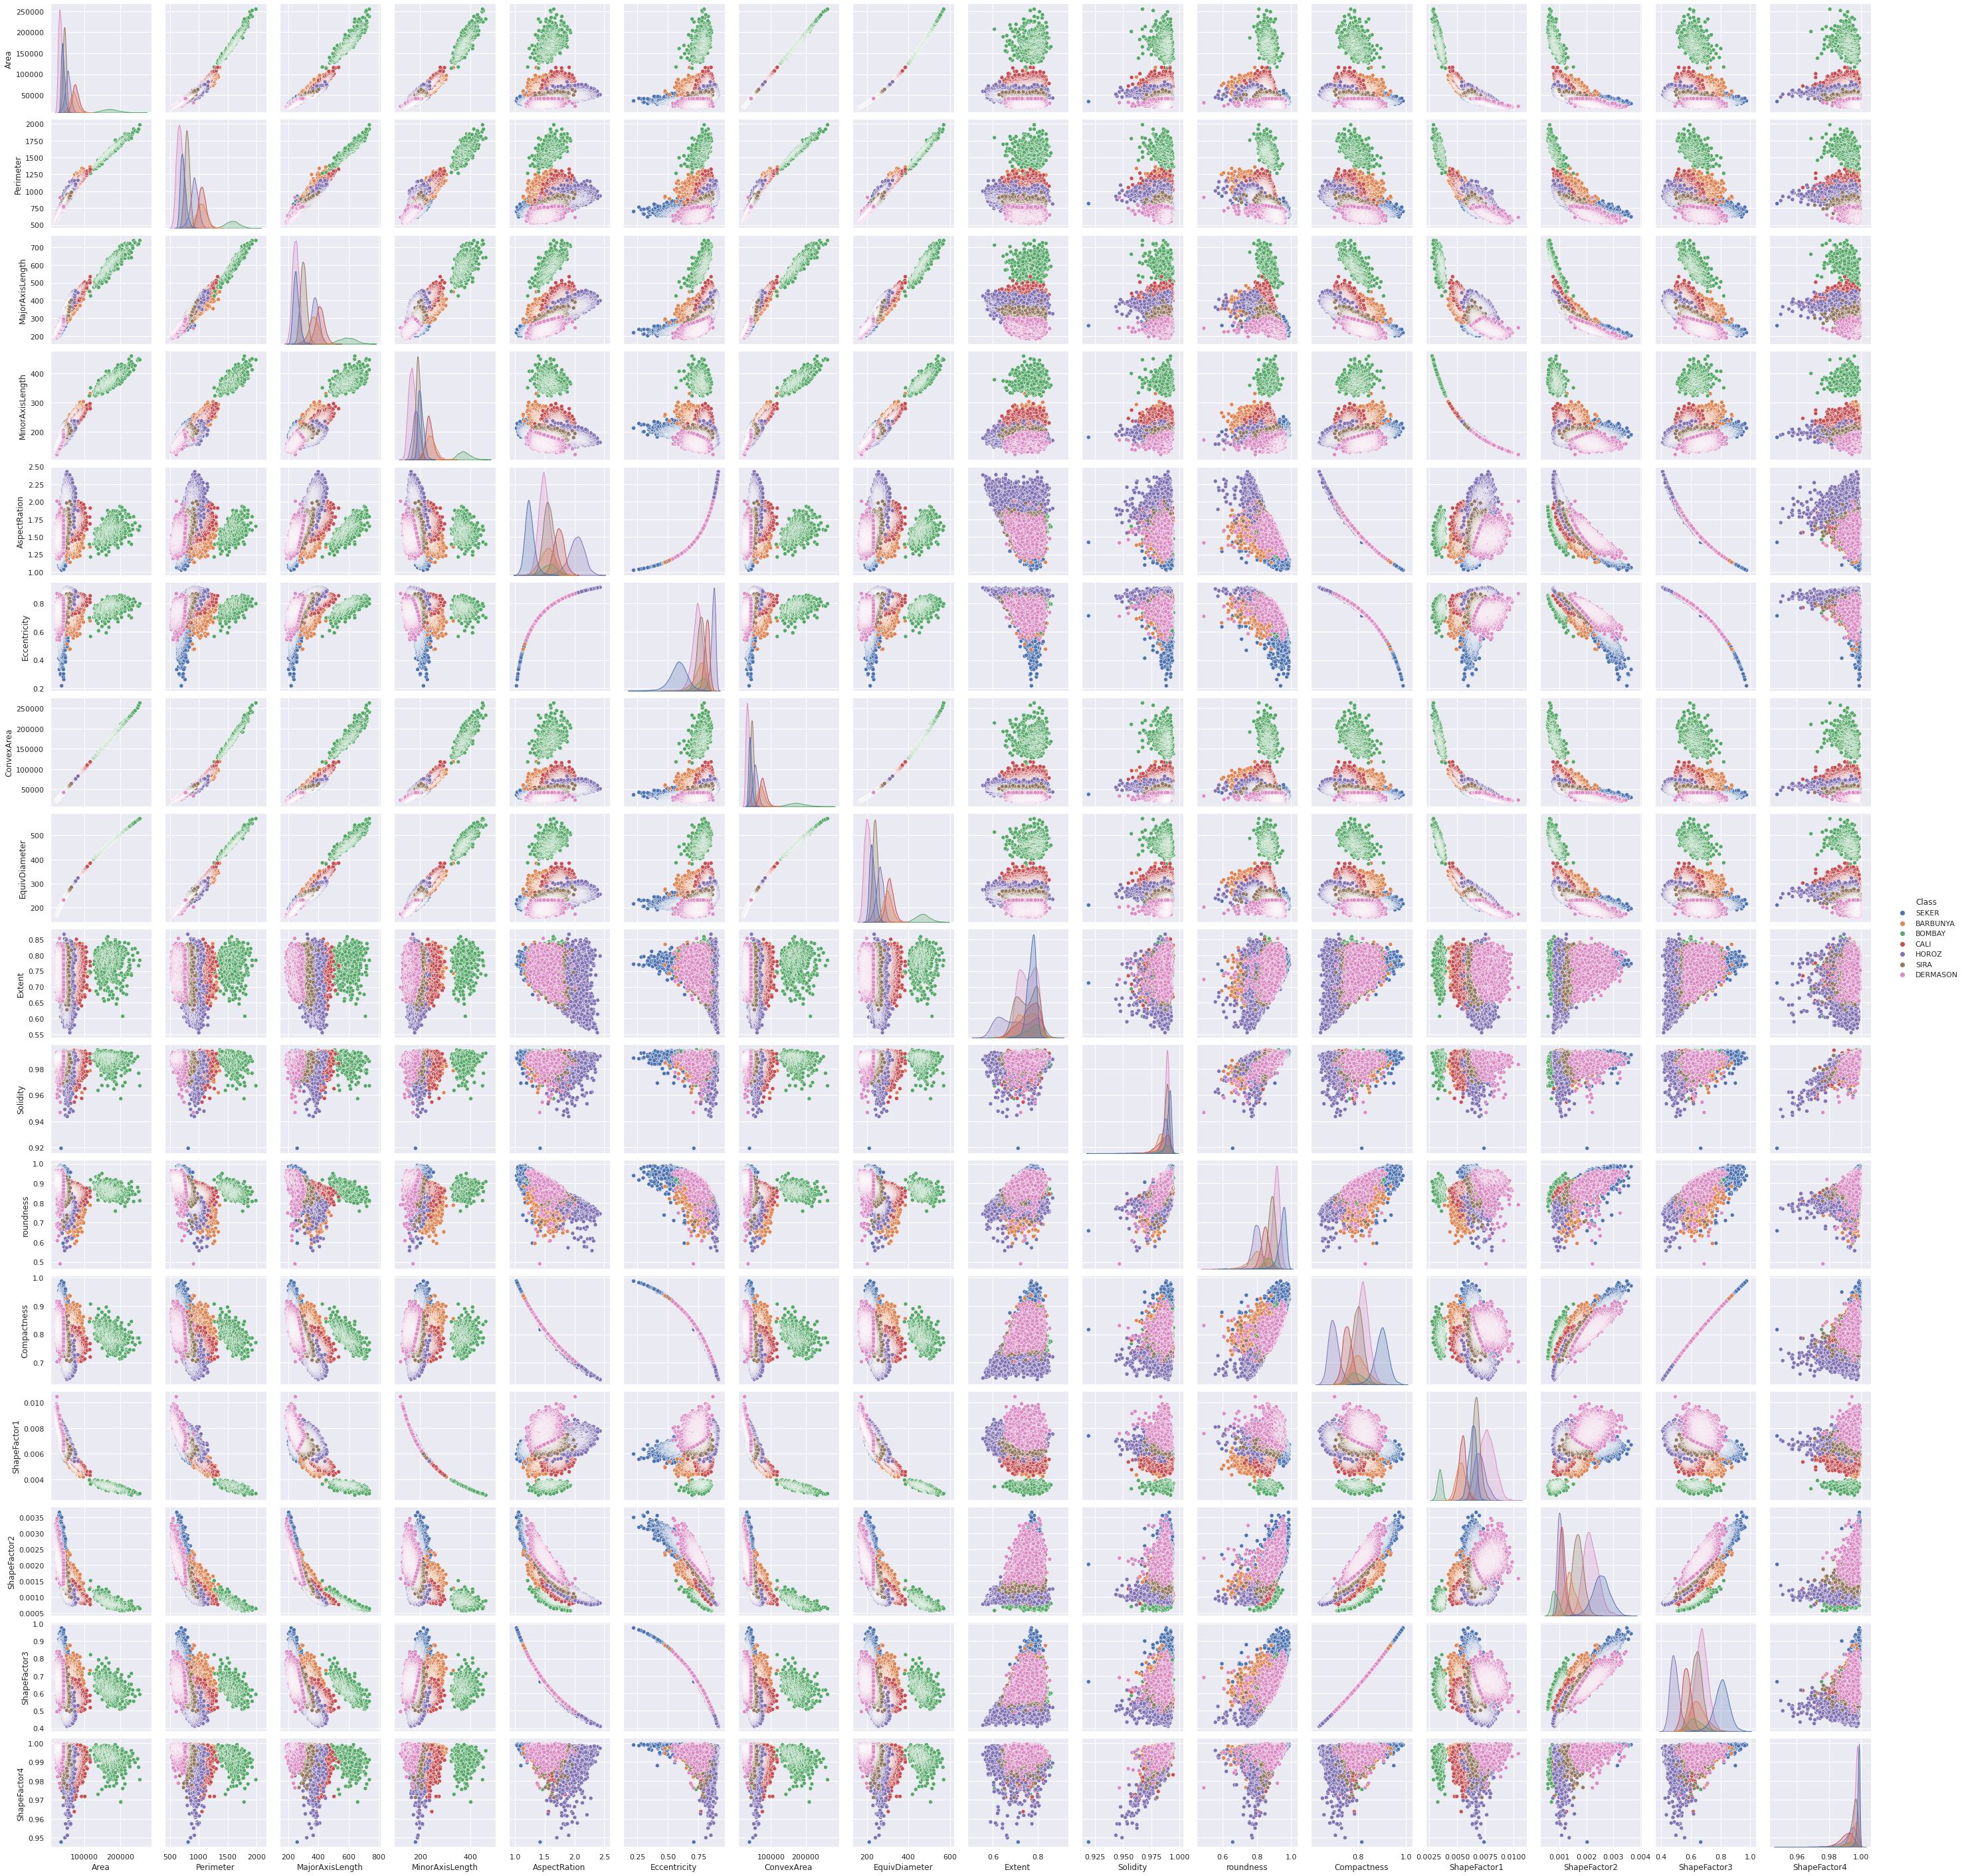

In [2]:
#Get data
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
sns.pairplot(df, hue="Class")
unique_entries = set(df['Class'])
df.replace(unique_entries, np.arange(len(unique_entries)), inplace=True)
df.head(25)

In [3]:
dataSet = df.to_numpy()
train, test = train_test_split(dataSet, test_size=0.2, shuffle=True)

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png")

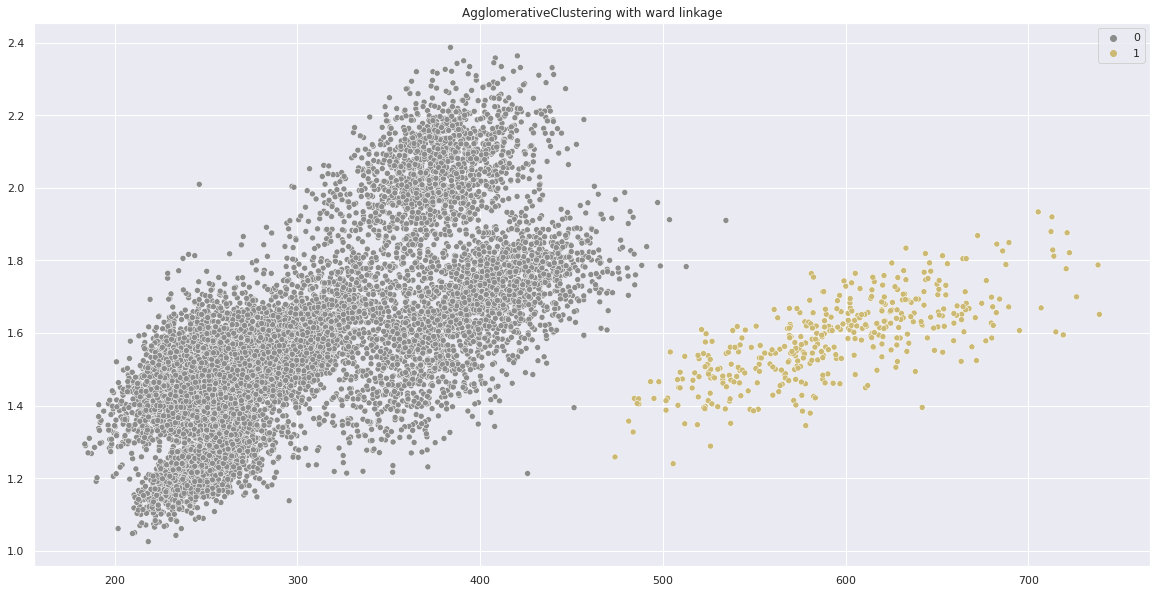

In [5]:
from sklearn.cluster import AgglomerativeClustering

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))

model = AgglomerativeClustering(linkage="ward")

out = model.fit_predict(train[:,:-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("AgglomerativeClustering with ward linkage")
sns.scatterplot(x=train[:,2], y=train[:,4], hue=out, palette=palette, ax=ax)
plt.show()

<AxesSubplot:title={'center':'KDE'}, ylabel='Density'>

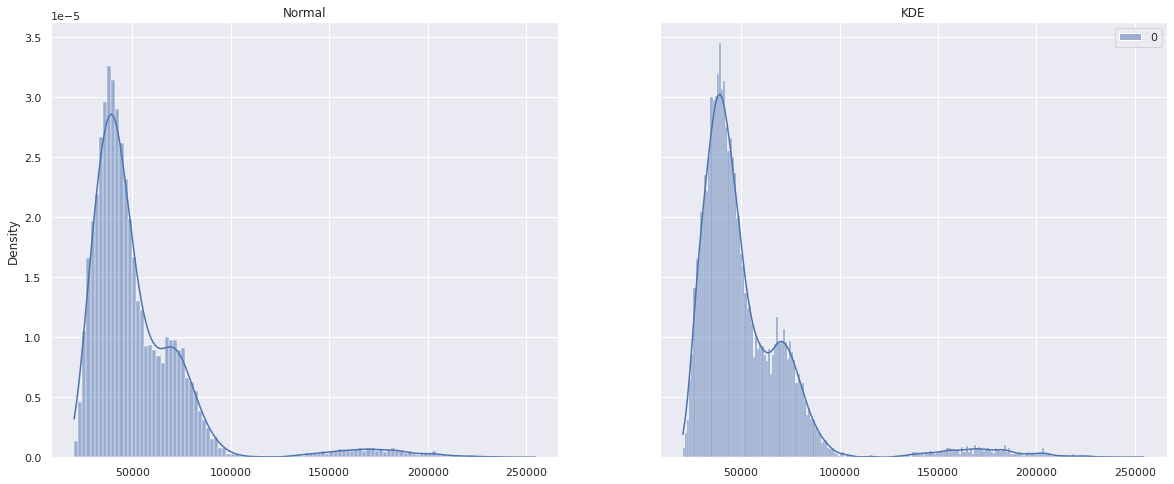

In [6]:
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20, 8))

ax[0].title.set_text("Normal")
sns.histplot(dataSet[:,0], ax=ax[0], stat="density", kde=True)

kde = KernelDensity(kernel='gaussian').fit(dataSet[:,0].reshape(-1, 1))

newData = kde.sample(int(1e5))
ax[1].title.set_text("KDE")
sns.histplot(newData, ax=ax[1], stat="density", kde=True)

In [7]:
Zdata = dataSet[:,0:1]
print(f"Oryginal data size {Zdata.shape}")

mean = np.mean(Zdata)

std = np.std(Zdata)

low = mean - 3 * std

high = mean + 3 * std

Zdata2 = Zdata[np.where((Zdata > low) & (Zdata < high))]

print(f"Remaining data count: {Zdata2.shape}")
print(f"Remaining data %: {100*Zdata2.shape[0]/Zdata.shape[0]}%")

Oryginal data size (13611, 1)
Remaining data count: (13128,)
Remaining data %: 96.45139960326206%


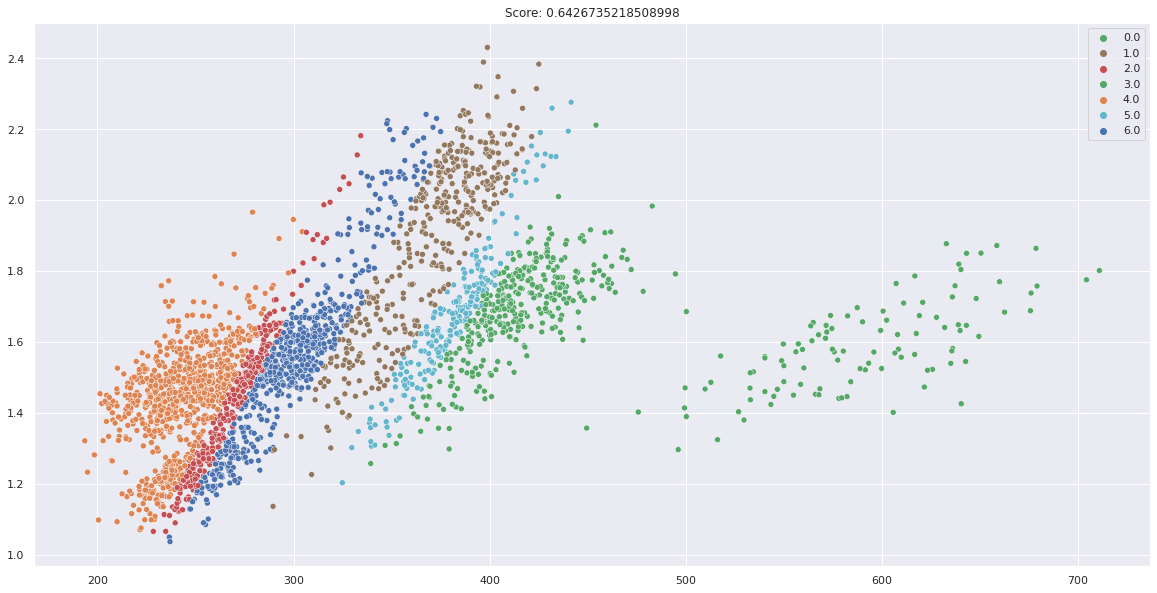

In [8]:
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))

model = BaggingClassifier(base_estimator=SVC(kernel="poly"), n_estimators=5)

model.fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])


palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("Score: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette, ax=ax)
plt.show()

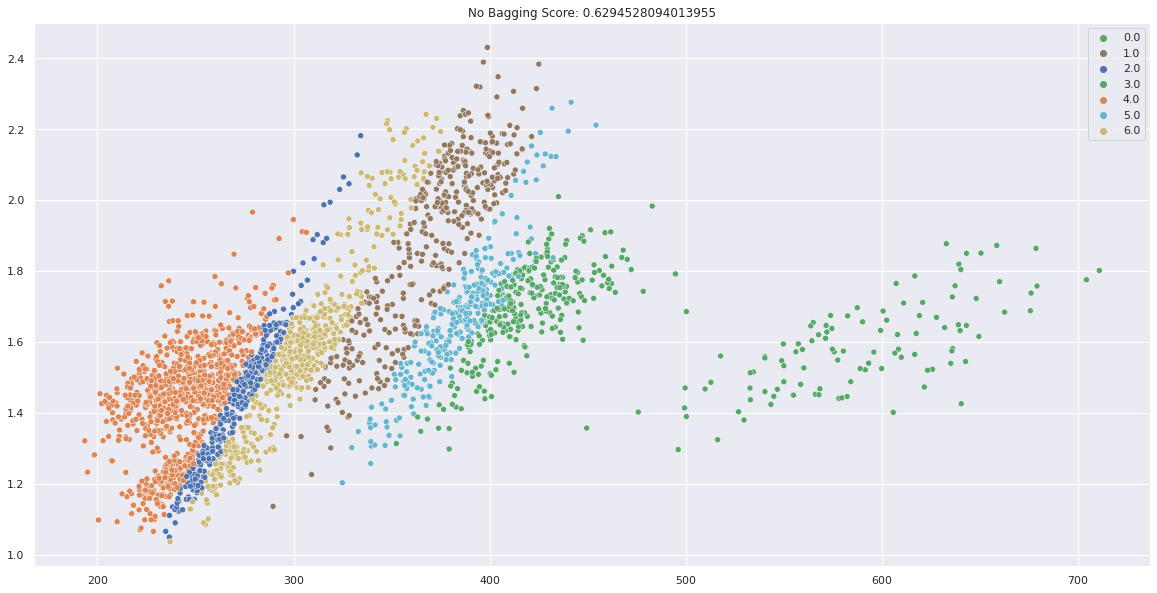

In [9]:
model = SVC(kernel="poly", degree=5)
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))
model.fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("No Bagging Score: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette, ax=ax)
plt.show()

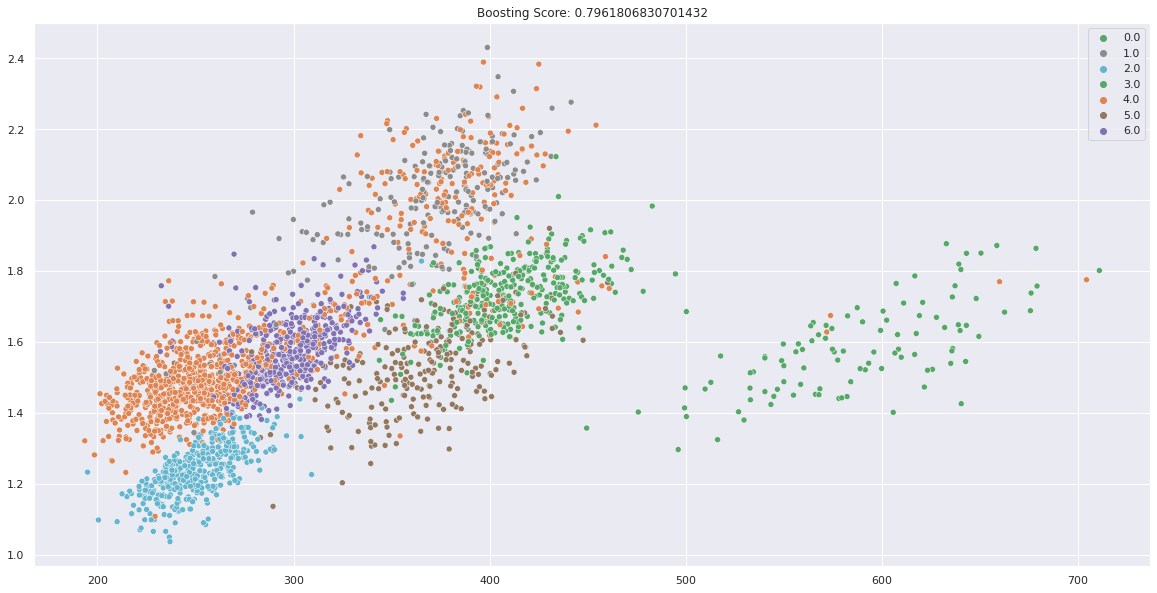

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=2)

model.fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("Boosting Score: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette, ax=ax)
plt.show()


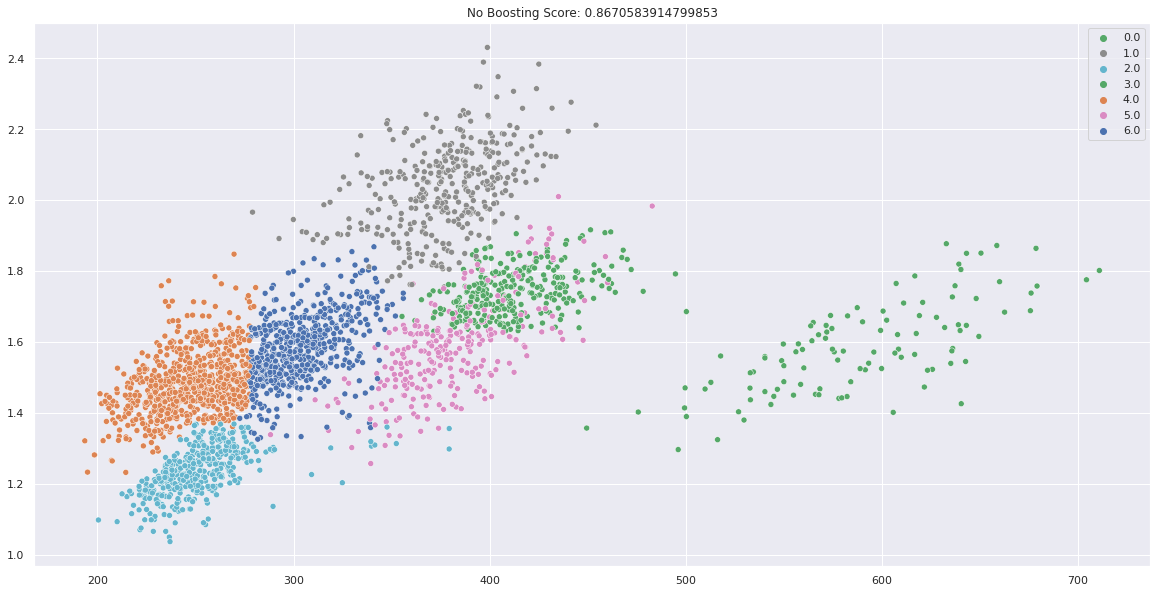

In [11]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))
model = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0, max_depth=2)

model.fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("No Boosting Score: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette, ax=ax)
plt.show()


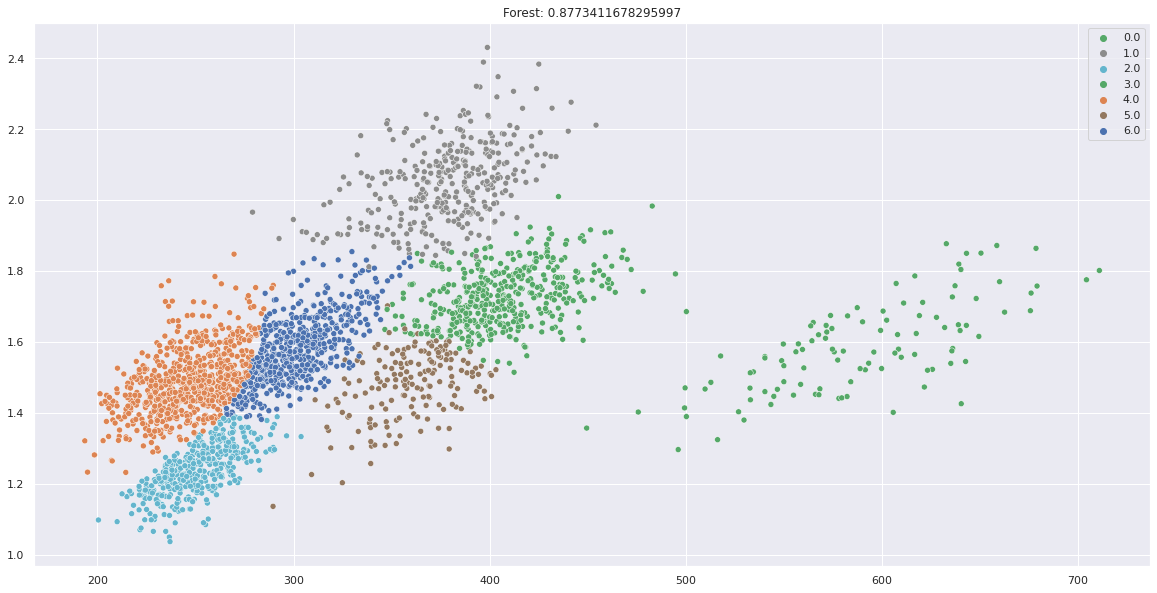

In [12]:
from sklearn.ensemble import RandomForestClassifier

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))

model = RandomForestClassifier(n_estimators=100, max_depth=4)

model.fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("Forest: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette, ax=ax)
plt.show()

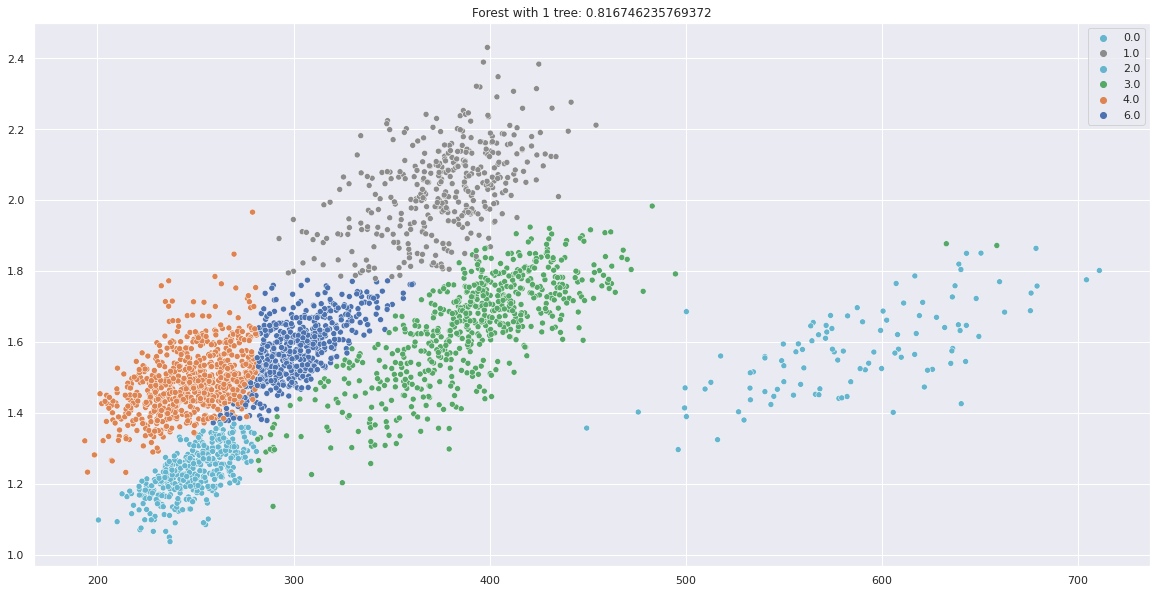

In [13]:
from sklearn.ensemble import RandomForestClassifier

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))

model = RandomForestClassifier(n_estimators=1, max_depth=4)

model.fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("Forest with 1 tree: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette, ax=ax)
plt.show()

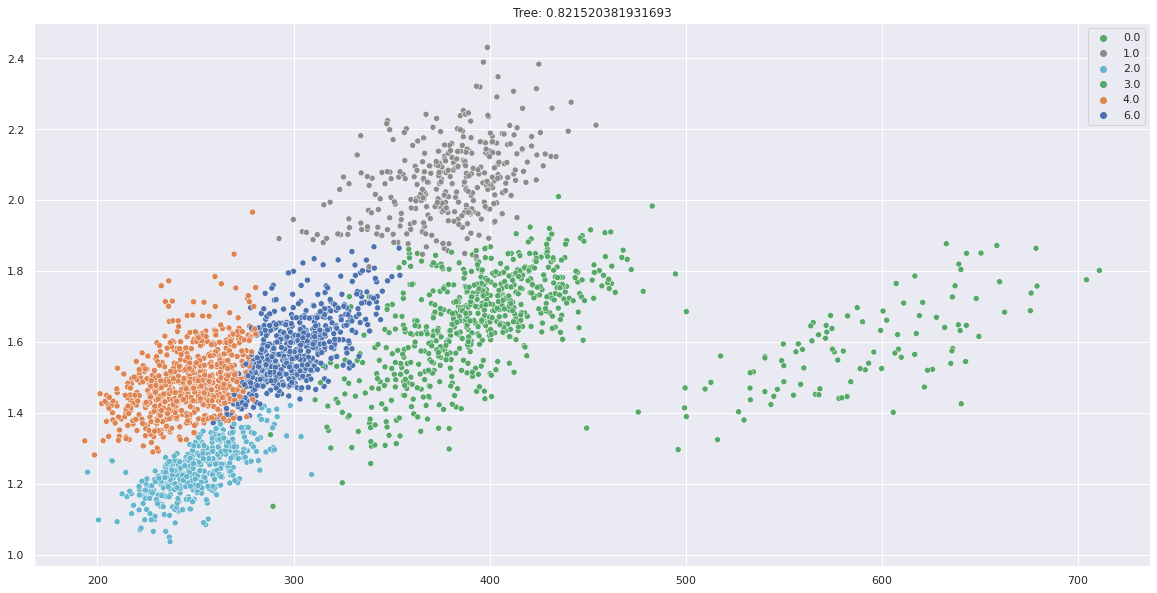

In [14]:
from sklearn.tree import DecisionTreeClassifier

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 10))

model = DecisionTreeClassifier( max_depth=4)

model.fit(train[:,:-1], train[:,-1])

out = model.predict(test[:,:-1])
score = model.score(test[:,:-1], test[:,-1])

palette = dict(zip(out, sns.color_palette(n_colors=len(out))))
plt.title("Tree: " + str(score))
sns.scatterplot(x=test[:,2], y=test[:,4], hue=out, palette=palette, ax=ax)
plt.show()